In [1]:
!pip install arnie
!pip install draw_rna
!conda config --set auto_update_conda false
!conda install -c bioconda eternafold --yes
%env ETERNAFOLD_PATH=/opt/conda/bin/eternafold-bin
%env ETERNAFOLD_PARAMETERS=/opt/conda/lib/eternafold-lib/parameters/EternaFoldParams.v1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 11.3 MB/s eta 0:00:00
Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.3
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - eternafold


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    eternafold-1.3.1           |       h4ac6f70_0        17.6 MB  bioconda
    openssl-3.1.4              |       hd590300_0         2.5 MB  conda-forge
    ------------------------------------------------------------
                    

In [4]:
import numpy as np
from arnie.mfe import mfe
from arnie.bpps import bpps
from draw_rna.ipynb_draw import draw_struct

def plot_struct(sequence):
    structure = mfe(sequence,package="eternafold")

    bp_matrix = bpps(sequence,package="eternafold")
    p_unp_vec = 1 - np.sum(bp_matrix, axis=0)

    draw_struct(sequence, structure, c = p_unp_vec, cmap = 'viridis')

In [5]:
%%time
import pandas as pd

df = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/train_data_QUICK_START.csv')
print(df.shape)
df.head()

(335616, 416)
CPU times: user 12.8 s, sys: 665 ms, total: 13.4 s
Wall time: 13.4 s


,sequence_id,sequence,experiment_type,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,2A3_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,DMS_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,2A3_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,DMS_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,2A3_MaP,DasLabBigLib_OneMil_Replicates_from_previous_l...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


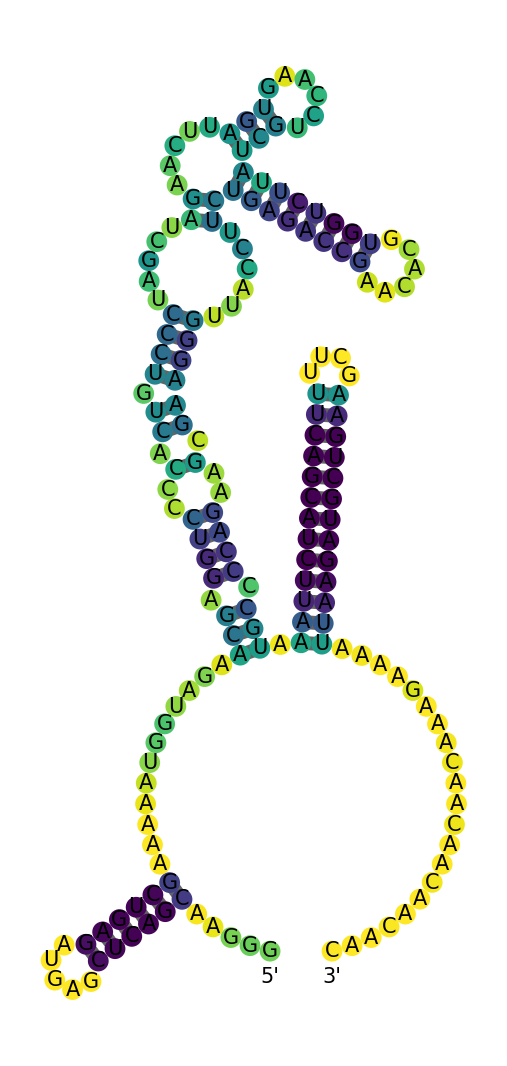

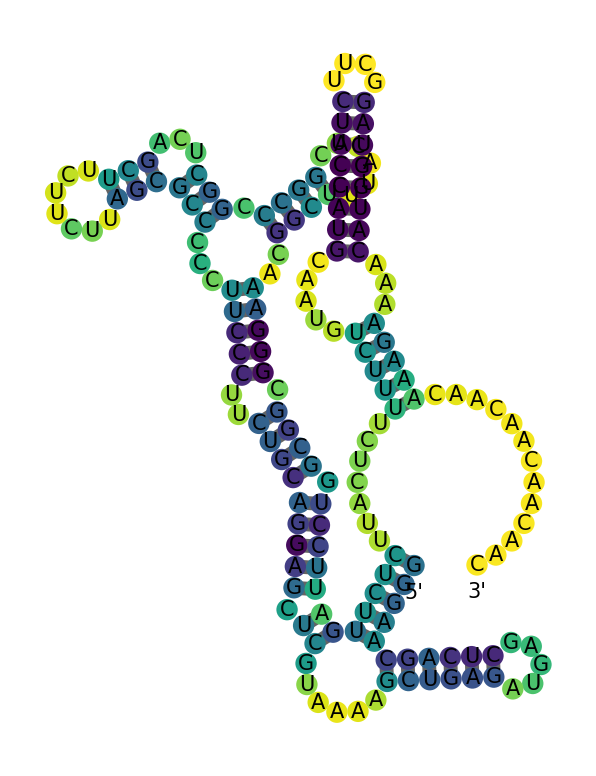

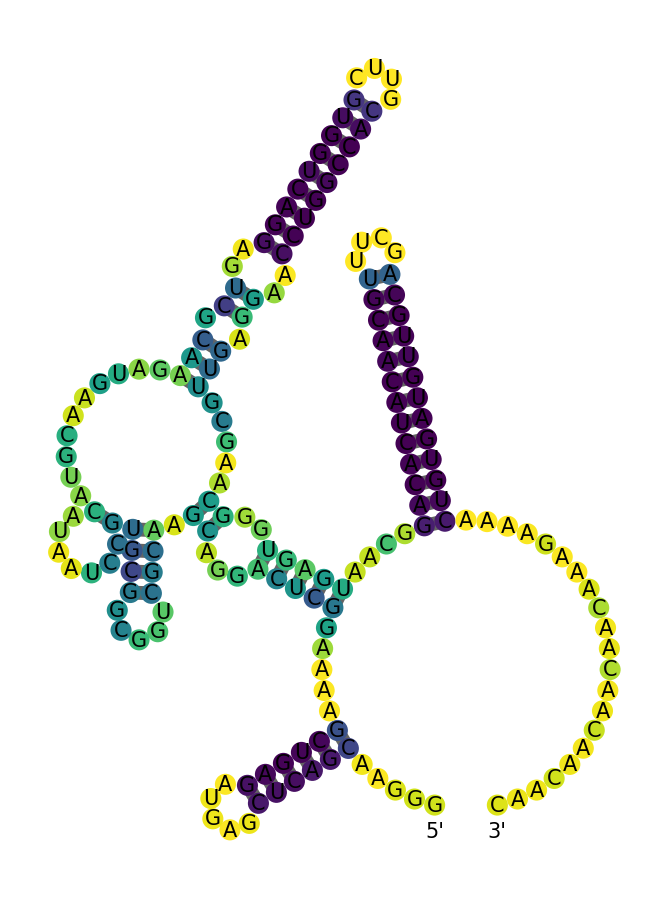

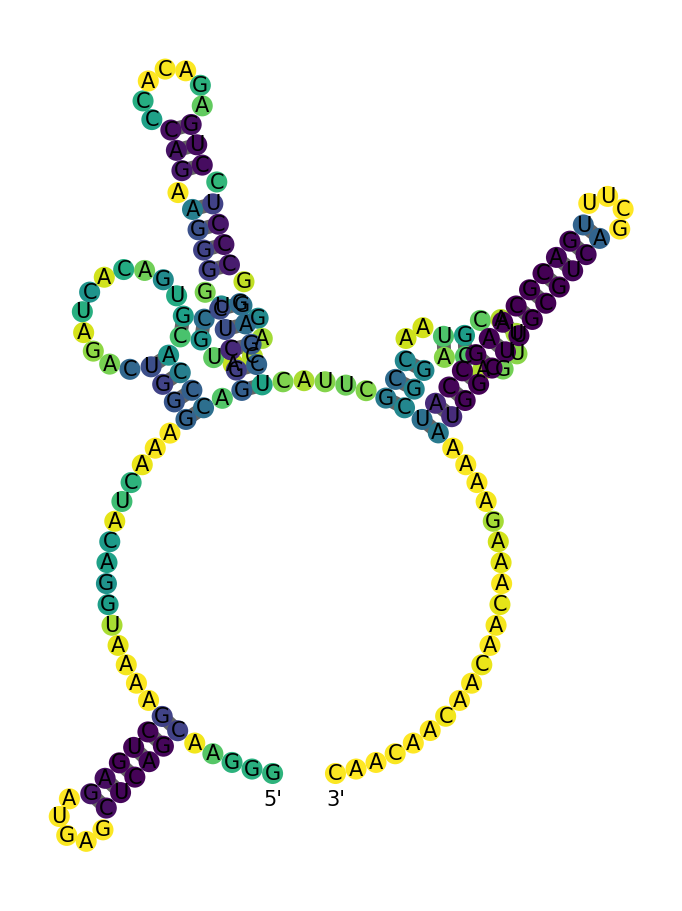

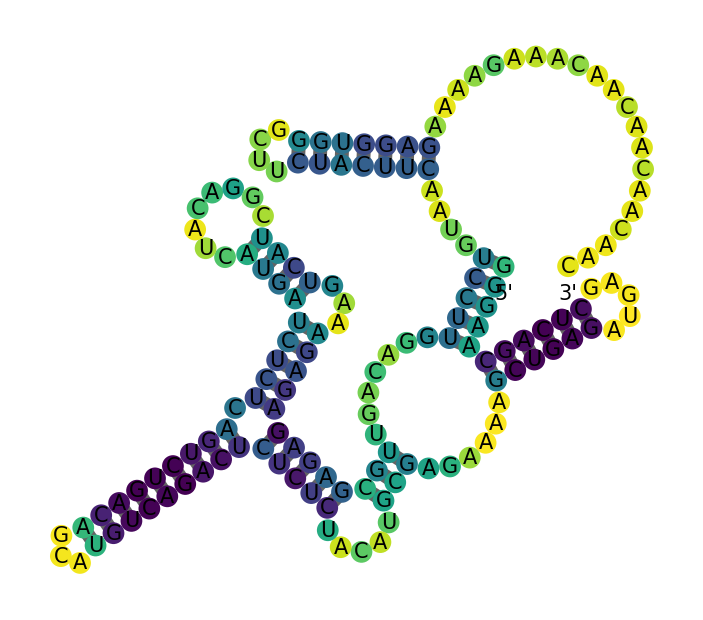

In [6]:
sequences = df['sequence'].sample(n = 5, replace = False).tolist()

for sequence in sequences:
    plot_struct(sequence)